In [1]:
import os

os.environ["SEED"] = "0"
import numpy as np
import pandas as pd
from ConfigSpace import Configuration

from src.instance.SAT_Instance import SAT_Instance, SAT_from_index_file
from src.solver.SAT_Riss_Solver import SAT_Riss_Solver
from src.constant import DATA_DIR, DATABASE_DIR
from src.database import DB
from src.database.queries import get_model_training_data

In [12]:
instances = SAT_from_index_file(
    filepath=DATA_DIR / "SAT" / "index.json",
    max_cost=100.0,
    max_time=10.0,
)

train_instances = instances[:30]
test_instances = instances[30:80]

In [8]:
db = DB("run-plain-30-1027394.db")
df = db.query2df("select * from results")
instances = db.query2df("select * from instances")

In [9]:
(df["cost"] == 100.0).value_counts(normalize=True)

True     0.706
False    0.294
Name: cost, dtype: float64

In [10]:
df["filepath"] = df["instance_id"].map(instances.set_index("id")["filepath"])

df.assign(is_cutoff=lambda x: x["cost"] == 100).groupby(df["filepath"].str.contains("uuf"))["is_cutoff"].value_counts(normalize=True)

filepath  is_cutoff
False     False        0.532889
          True         0.467111
True      True         0.944889
          False        0.055111
Name: is_cutoff, dtype: float64

In [7]:
instances = SAT_from_index_file(
    filepath=DATA_DIR / "SAT" / "index.json",
    max_cost=100.0,
    max_time=10.0,
)

train_instances = instances[:15] + instances[80:95]
test_instances = instances[15:65] + instances[95:145]

In [3]:
for i in train_instances:
    print(i.calculate_features())

ResultWithTime(result={'nvarsOrig': 175.0, 'nclausesOrig': 753.0, 'nvars': 171.0, 'nclauses': 748.0, 'reducedVars': 0.023391813, 'reducedClauses': 0.006684492, 'Pre-featuretime': 0.0, 'vars-clauses-ratio': 0.228609626, 'POSNEG-RATIO-CLAUSE-mean': 0.488235294, 'POSNEG-RATIO-CLAUSE-coeff-variation': 0.592382782, 'POSNEG-RATIO-CLAUSE-min': 0.0, 'POSNEG-RATIO-CLAUSE-max': 1.0, 'POSNEG-RATIO-CLAUSE-entropy': 0.727296016, 'VCG-CLAUSE-mean': 0.017786221, 'VCG-CLAUSE-coeff-variation': 0.067702297, 'VCG-CLAUSE-min': 0.01754386, 'VCG-CLAUSE-max': 0.029239766, 'VCG-CLAUSE-entropy': 0.174145318, 'UNARY': 0.0, 'BINARY+': 0.0, 'TRINARY+': 0.959893048, 'Basic-featuretime': 0.0, 'VCG-VAR-mean': 0.017786221, 'VCG-VAR-coeff-variation': 0.29377768, 'VCG-VAR-min': 0.00802139, 'VCG-VAR-max': 0.03342246, 'VCG-VAR-entropy': 2.681140387, 'POSNEG-RATIO-VAR-mean': 0.245430542, 'POSNEG-RATIO-VAR-stdev': 0.184298485, 'POSNEG-RATIO-VAR-min': 0.0, 'POSNEG-RATIO-VAR-max': 0.764705882, 'POSNEG-RATIO-VAR-entropy': 3.3

In [41]:
# index = []
# for filepath in list((DATA_DIR / "SAT").glob("*.cnf")):
#     v = "/".join(filepath.parts[-2:])
#     index.append(v)

# index

In [39]:
# for filepath in list((DATA_DIR / "SAT").glob("*.cnf")):
#     # Read the file
#     with open(filepath, 'r') as f:
#         lines = f.readlines()
    
#     # Remove last 4 lines and add one empty line
#     modified_lines = lines[:-4] + ['\n']
    
#     # Write back to the file
#     with open(filepath, 'w') as f:
#         f.writelines(modified_lines)
    
#     print(f"Processed: {filepath.name}")

In [6]:
df = DB(DATABASE_DIR / "run-plain-30-1026926.db").query2df(""" select * from results """)

In [21]:
instances = DB(DATABASE_DIR / "run-plain-30-1026926.db").query2df(""" select * from instances """)

In [22]:
instances

,id,filepath,max_cost,max_time
0,1809788922383865018,SAT/uf150-01.cnf,100.0,10.0
1,1168745924961750174,SAT/uf150-02.cnf,100.0,10.0
2,2114565810240806032,SAT/uf150-03.cnf,100.0,10.0
3,802789582027136028,SAT/uf150-04.cnf,100.0,10.0
4,1622458119160454530,SAT/uf150-05.cnf,100.0,10.0
5,1816655896816357876,SAT/uuf150-01.cnf,100.0,10.0
6,1484545366653186348,SAT/uuf150-02.cnf,100.0,10.0
7,1190645092204590961,SAT/uuf150-03.cnf,100.0,10.0
8,1780907961750115425,SAT/uuf150-04.cnf,100.0,10.0
9,1018740865066386031,SAT/uuf150-05.cnf,100.0,10.0


In [10]:
(df["cost"] == 100).value_counts(normalize=True)

False    0.608667
True     0.391333
Name: cost, dtype: float64

In [23]:
df["filepath"] = df["instance_id"].map(instances.set_index("id")["filepath"])
df

,id,prefix,solver_id,instance_id,cost,time,cached,surrogate,error,filepath
0,config;aac_iter=1_528985200268686587_180978892...,config;aac_iter=1,528985200268686587,1809788922383865018,0.003763,0.003763,0,0,0,SAT/uf150-01.cnf
1,config;aac_iter=1_386181383168834235_180978892...,config;aac_iter=1,386181383168834235,1809788922383865018,0.126468,0.126468,0,0,0,SAT/uf150-01.cnf
2,config;aac_iter=1_528985200268686587_116874592...,config;aac_iter=1,528985200268686587,1168745924961750174,0.153609,0.153609,0,0,0,SAT/uf150-02.cnf
3,config;aac_iter=1_386181383168834235_116874592...,config;aac_iter=1,386181383168834235,1168745924961750174,0.166261,0.166261,0,0,0,SAT/uf150-02.cnf
4,config;aac_iter=1_386181383168834235_802789582...,config;aac_iter=1,386181383168834235,802789582027136028,0.020920,0.020920,0,0,0,SAT/uf150-04.cnf
...,...,...,...,...,...,...,...,...,...,...
1495,config;aac_iter=75_1187937394440329533_1190645...,config;aac_iter=75,1187937394440329533,1190645092204590961,100.000000,10.000000,0,0,1,SAT/uuf150-03.cnf
1496,config;aac_iter=75_1004731694075642095_1780907...,config;aac_iter=75,1004731694075642095,1780907961750115425,100.000000,10.000000,0,0,1,SAT/uuf150-04.cnf
1497,config;aac_iter=75_1187937394440329533_1780907...,config;aac_iter=75,1187937394440329533,1780907961750115425,100.000000,10.000000,0,0,1,SAT/uuf150-04.cnf
1498,config;aac_iter=75_1004731694075642095_1018740...,config;aac_iter=75,1004731694075642095,1018740865066386031,100.000000,10.000000,0,0,1,SAT/uuf150-05.cnf


In [ ]:
df["filepath"] = df["instance_id"].map(instances.set_index("id")["filepath"])

df.assign(is_cutoff=lambda x: x["cost"] == 100).groupby(df["filepath"].str.contains("uuf"))["is_cutoff"].value_counts(normalize=True)

filepath  is_cutoff
False     False        0.769333
          True         0.230667
True      True         0.552000
          False        0.448000
Name: is_cutoff, dtype: float64

<Axes: ylabel='Frequency'>

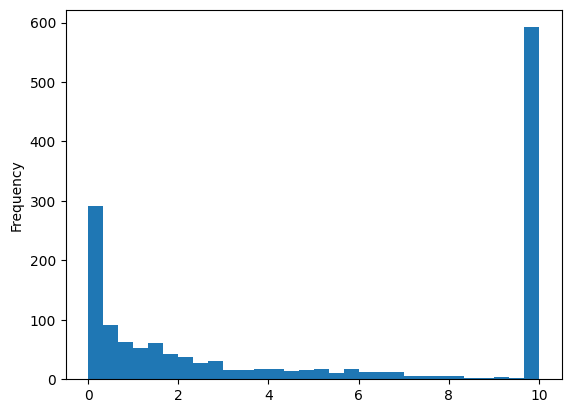

In [19]:
df["time"].plot.hist(bins=30)

In [20]:
with open("minisat1m_yes.uri") as f:
    lines = f.readlines()
lines = [line.strip() for line in lines if line.strip()]

dir_ = DATA_DIR / "SAT" / "gbd"

In [22]:
lines

['http://benchmark-database.de/file/000a41cdca43be89ed62ea3abf2d0b64',
 'http://benchmark-database.de/file/0033baadbd48d3f880e9b5a733bd4950',
 'http://benchmark-database.de/file/003a77d2aa15a5f93aa2cfe79b986c9e',
 'http://benchmark-database.de/file/005ccb378ced61c02105ed7ee0a62038',
 'http://benchmark-database.de/file/0064aa2e16c9d4b18d32a45d3073fce9',
 'http://benchmark-database.de/file/00a981f385cd209d41e1efa1f5f29bac',
 'http://benchmark-database.de/file/00b9b467c26540853360491401da61a5',
 'http://benchmark-database.de/file/00be590675417eba2bb2585790ac392d',
 'http://benchmark-database.de/file/00e289099ea9bcef6a056a8c8ba8a3c0',
 'http://benchmark-database.de/file/00f2eb377986e7decbc863931680a3b2',
 'http://benchmark-database.de/file/00f969737ba4338bd233cd3ed249bd55',
 'http://benchmark-database.de/file/010c9d7a6e9e6cac63f110915d9dd56e',
 'http://benchmark-database.de/file/0141b82b3d2a411d8c2168119e2d7452',
 'http://benchmark-database.de/file/0152d286cde406747d179c36a95c2fdc',
 'http

In [8]:
solver = SAT_Riss_Solver()
instances = SAT_from_index_file(filepath=DATA_DIR / "SAT" / "index_u150.json", max_cost=10.0, max_time=10.0)


In [11]:
instances

InstanceList(size=10)[SAT_Instance(filepath=SAT/uf150-01.cnf), SAT_Instance(filepath=SAT/uf150-02.cnf), SAT_Instance(filepath=SAT/uf150-03.cnf), SAT_Instance(filepath=SAT/uf150-04.cnf), SAT_Instance(filepath=SAT/uf150-05.cnf), SAT_Instance(filepath=SAT/uuf150-01.cnf), SAT_Instance(filepath=SAT/uuf150-02.cnf), SAT_Instance(filepath=SAT/uuf150-03.cnf), SAT_Instance(filepath=SAT/uuf150-04.cnf), SAT_Instance(filepath=SAT/uuf150-05.cnf)]

In [5]:
solver = SAT_Riss_Solver()
instances = SAT_from_index_file(filepath=DATA_DIR / "SAT" / "index_u75.json", max_cost=10.0, max_time=10.0)

for instance in instances:
    solver.solve(instance, prefix="test")

[2025-05-27 12:56:35] DEBUG     solve(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uf75-01.cnf))
[2025-05-27 12:56:35] DEBUG     Solver.Result(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uf75-01.cnf), cost=10.0000, time=10.0000, cached=False, surrogate=False, error=True)
[2025-05-27 12:56:35] DEBUG     solve(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uf75-02.cnf))
[2025-05-27 12:56:35] DEBUG     Solver.Result(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uf75-02.cnf), cost=10.0000, time=10.0000, cached=False, surrogate=False, error=True)
[2025-05-27 12:56:35] DEBUG     solve(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uf75-03.cnf))
[2025-05-27 12:56:35] DEBUG     Solver.Result(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uf75-03.cnf), cost=10.0000

Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uf75-01.cnf): [WinError 2] The system cannot find the file specified
Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uf75-02.cnf): [WinError 2] The system cannot find the file specified
Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uf75-03.cnf): [WinError 2] The system cannot find the file specified
Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uf75-04.cnf): [WinError 2] The system cannot find the file specified


[2025-05-27 12:56:35] DEBUG     Solver.Result(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uf75-05.cnf), cost=10.0000, time=10.0000, cached=False, surrogate=False, error=True)
[2025-05-27 12:56:35] DEBUG     solve(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uuf75-01.cnf))
[2025-05-27 12:56:35] DEBUG     Solver.Result(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uuf75-01.cnf), cost=10.0000, time=10.0000, cached=False, surrogate=False, error=True)
[2025-05-27 12:56:35] DEBUG     solve(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uuf75-02.cnf))
[2025-05-27 12:56:35] DEBUG     Solver.Result(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uuf75-02.cnf), cost=10.0000, time=10.0000, cached=False, surrogate=False, error=True)
[2025-05-27 12:56:35] DEBUG     solve(prefix=test, solver=Solver(id=809610

Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uf75-05.cnf): [WinError 2] The system cannot find the file specified
Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uuf75-01.cnf): [WinError 2] The system cannot find the file specified
Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uuf75-02.cnf): [WinError 2] The system cannot find the file specified
Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uuf75-03.cnf): [WinError 2] The system cannot find the file specified
Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uuf75-04.cnf): [WinError 2] The system cannot find the file specified


[2025-05-27 12:56:35] DEBUG     solve(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uuf75-05.cnf))
[2025-05-27 12:56:35] DEBUG     Solver.Result(prefix=test, solver=Solver(id=80961051775322991), instance=SAT_Instance(filepath=SAT/uuf75-05.cnf), cost=10.0000, time=10.0000, cached=False, surrogate=False, error=True)


Error running solver=Solver(id=80961051775322991) on instance=SAT_Instance(filepath=SAT/uuf75-05.cnf): [WinError 2] The system cannot find the file specified


In [6]:
for instance in instances:
    print(instance)

SAT_Instance(filepath=SAT/uf250-01.cnf)
SAT_Instance(filepath=SAT/uf250-02.cnf)
SAT_Instance(filepath=SAT/uf250-03.cnf)
SAT_Instance(filepath=SAT/uf250-04.cnf)
SAT_Instance(filepath=SAT/uf250-05.cnf)
SAT_Instance(filepath=SAT/uuf250-01.cnf)
SAT_Instance(filepath=SAT/uuf250-02.cnf)
SAT_Instance(filepath=SAT/uuf250-03.cnf)
SAT_Instance(filepath=SAT/uuf250-04.cnf)
SAT_Instance(filepath=SAT/uuf250-05.cnf)


In [ ]:
solver.to_dict()

In [ ]:
test_instances = TSP_from_index_file(filepath=DATA_DIR / "TSP" / "TEST_400" / "index.json", max_cost=100.0, max_time=10.0)
instance = test_instances[23]
instance

In [ ]:
solver = TSP_LKH_Solver()
solver

In [ ]:
solver.solve(instance, prefix="test")

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4.5, 4.5))

df = instance._read_file_to_df()
plt.scatter(df["X"], df["Y"], s=6)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("grid.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
idx = []
with open("out") as f:
    for line in f:
        if line.startswith("NAME"):
            continue
        elif line.startswith("COMMENT"):
            continue
        elif line.startswith("TYPE"):
            continue
        elif line.startswith("DIMENSION"):
            continue
        elif line.startswith("TOUR"):
            continue
        elif line.startswith("-1"):
            break
        idx.append(int(line.strip()))

fig, ax = plt.subplots(figsize=(4.5, 4.5))
df = instance._read_file_to_df()
plt.plot(df.loc[idx, "X"], df.loc[idx, "Y"], c="red", lw=0.8, zorder=1)
plt.scatter(df["X"], df["Y"], s=6, zorder=2)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("grid_solved.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
instance = test_instances[4]
fig, ax = plt.subplots(figsize=(4.5, 4.5))

df = instance._read_file_to_df()
plt.scatter(df["X"], df["Y"], s=6)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("cluster_netgen.pdf", bbox_inches="tight", transparent=True)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))

df = instance._read_file_to_df()
plt.scatter(df["X"], df["Y"], s=6)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("grid.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
# import joblib
# paths = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob("*.db"))
# for path in paths:
#     db = DB(path)

#     configured_portfolio_solvers = pd.read_sql_query(""" 
#     SELECT DISTINCT solver_id FROM results
#     WHERE prefix LIKE 'test%'                  
#     """, db._conn)["solver_id"].to_list()

#     portfolio = Portfolio.from_iterable([TSP_LKH_Solver.from_db(id_, db) for id_ in configured_portfolio_solvers])
#     joblib.dump(portfolio, MAIN_DIR / "portfolios" / "200" / f"{path.stem}.pkl")

# paths = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "400" / "database").glob("*.db"))
# for path in paths:
#     db = DB(path)

#     configured_portfolio_solvers = pd.read_sql_query(""" 
#     SELECT DISTINCT solver_id FROM results
#     WHERE prefix LIKE 'test%'                  
#     """, db._conn)["solver_id"].to_list()

#     portfolio = Portfolio.from_iterable([TSP_LKH_Solver.from_db(id_, db) for id_ in configured_portfolio_solvers])
#     joblib.dump(portfolio, MAIN_DIR / "portfolios" / "400" / f"{path.stem}.pkl")

In [ ]:
# import joblib

# paths = list((MAIN_DIR / "portfolios" / "200").glob("run-plain-30-*.pkl"))
# for path in paths:
#     run_id = path.stem.split("-")[-1]
#     portfolio = joblib.load(path)

#     for i in range(100):
#         portfolio.evaluate(
#             test_instances,
#             prefix=f"{run_id};test{i}",
#             calculate_features=False,
#             cache=False,
#         )